#Mounting Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import cv2
from time import time
import matplotlib.pyplot as plt
import matplotlib
from keras.callbacks import TensorBoard
import os
from keras.optimizers import SGD
from os import listdir
from os.path import join, basename
from keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img, img_to_array
from keras.regularizers import l2
from keras import regularizers


Using TensorFlow backend.


In [0]:
dirc='/gdrive/My Drive/Final Project/DermCNN data/'
labels=[]
data=[]
im_width=150
im_height=150

In [0]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

#Turning images to greyscale proved detrimental to the classification of the model, hence did not use it. 

In [20]:
for i in range(7):
    path=os.getcwd()+dirc+str(i+1)+'/'
    print(path)
    progress = 0
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    for file_name in image_files:
        image_file = str(path + file_name)
        img = cv2.imread(image_file)
        new_img = cv2.resize(img,(im_width,im_height))
        data.append(new_img)
        progress = progress+1
        labels.append(int(path[-2])-1)
        if progress%100==0:
            print('Progress '+str(progress)+' Images :'  + path[-2])

/content/gdrive/My Drive/Final Project/DermCNN data/1/
Progress 100 Images :1
Progress 200 Images :1
Progress 300 Images :1
Progress 400 Images :1
Progress 500 Images :1
Progress 600 Images :1
Progress 700 Images :1
Progress 800 Images :1
Progress 900 Images :1
Progress 1000 Images :1
Progress 1100 Images :1
Progress 1200 Images :1
Progress 1300 Images :1
Progress 1400 Images :1
Progress 1500 Images :1
Progress 1600 Images :1
Progress 1700 Images :1
/content/gdrive/My Drive/Final Project/DermCNN data/2/
Progress 100 Images :2
Progress 200 Images :2
Progress 300 Images :2
Progress 400 Images :2
Progress 500 Images :2
Progress 600 Images :2
Progress 700 Images :2
Progress 800 Images :2
Progress 900 Images :2
Progress 1000 Images :2
Progress 1100 Images :2
Progress 1200 Images :2
Progress 1300 Images :2
Progress 1400 Images :2
Progress 1500 Images :2
Progress 1600 Images :2
Progress 1700 Images :2
Progress 1800 Images :2
/content/gdrive/My Drive/Final Project/DermCNN data/3/
Progress 100 

In [21]:
data=np.array(data)
print(data.shape)
# data=data.reshape((data.shape)[0],(data.shape)[1],(data.shape)[2],3)
print(data.shape)
labels=np.array(labels)
print(labels.shape)
print(len(labels))
print(labels)
# labels.astype('uint8')
labels = keras.utils.to_categorical(labels, 7)

(13127, 150, 150, 3)
(13127, 150, 150, 3)
(13127,)
13127
[0 0 0 ... 6 6 6]


#Normalizing degraded the performance somehow,  so not using it


In [0]:
data = np.array(data).astype('float')
data /= 255

In [0]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [0]:
for i in range(10):
    shuffle(data,labels)

#Importing GoogleNet through keras applications on my custom image size, and with pre-trained weights on imagenet

In [41]:
model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(150,150,3), classes=7)

87916544/87910968 [==============================] - 2s 0us/step


#Training my network on all the layers of GoogleNet except first five. (Gave me the best results)

In [0]:
from keras import Model, layers
for layer in model.layers[:5]:
    layer.trainable = False

In [43]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
x = Dense(100,activation="relu")(x)
x = Dropout(0.7)(x)
x = Dense(7,activation='softmax')(x)

# creating the final model 
model_final = Model(input = model.input, output = x)
model_final.compile(keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_final.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_295 (Activation)     (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [44]:
history = model_final.fit(data,labels,
          batch_size=32,
          epochs=70,
          verbose=1,
          shuffle=True,
          validation_split=0.3)

Train on 9188 samples, validate on 3939 samples
Epoch 1/70
9188/9188 [==============================] - 153s 17ms/step - loss: 1.8835 - acc: 0.2767 - val_loss: 1.4068 - val_acc: 0.5679
Epoch 2/70
9188/9188 [==============================] - 123s 13ms/step - loss: 0.8924 - acc: 0.6852 - val_loss: 1.1124 - val_acc: 0.6469
Epoch 3/70
9188/9188 [==============================] - 123s 13ms/step - loss: 0.3670 - acc: 0.8930 - val_loss: 1.1573 - val_acc: 0.6994
Epoch 4/70
9188/9188 [==============================] - 125s 14ms/step - loss: 0.2044 - acc: 0.9438 - val_loss: 1.5027 - val_acc: 0.6905
Epoch 5/70
9188/9188 [==============================] - 124s 14ms/step - loss: 0.1699 - acc: 0.9543 - val_loss: 1.6842 - val_acc: 0.6789
Epoch 6/70
9188/9188 [==============================] - 123s 13ms/step - loss: 0.1181 - acc: 0.9688 - val_loss: 0.9842 - val_acc: 0.7631
Epoch 7/70
9188/9188 [==============================] - 123s 13ms/step - loss: 0.0947 - acc: 0.9779 - val_loss: 1.1456 - val_acc: 

KeyboardInterrupt: ignored

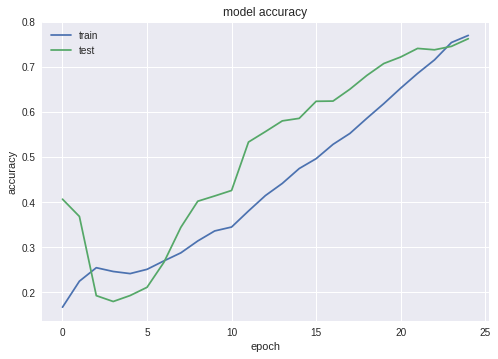

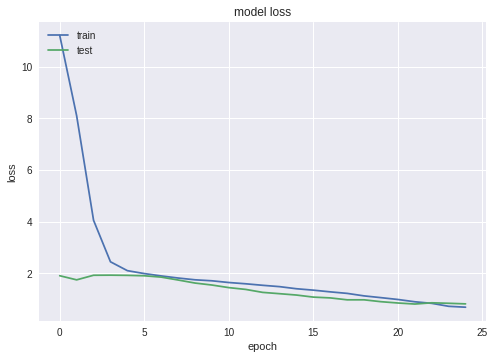

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()